In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston 
import pickle

from plotly.offline import iplot
import cufflinks as cf
import plotly as py
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
cf.go_offline()

In [3]:
boston=load_boston()

In [4]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
# Checking the description of data

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [12]:
# Adding dependent variable to the dataframe

df['TARGET']=pd.Series(boston.target)

In [13]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


# 1. EDA

In [591]:
# Checking for variable types

df.info()

# You can use astpye to convert dtype to float 32 to reduce the size of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [34]:
# Checking for missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [592]:
# Checking the size and shape of data

df.size, df.shape

(7084, (506, 14))

In [593]:
# Summary of dataframe

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA with Pandas_Profiling

In [594]:
#from pandas_profiling import ProfileReport


In [595]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

## Checking for number of unique categories in numerical features

In [596]:
for features in df.columns:
    unique=df[features].nunique()
    print(f'{features}: {unique}')

CRIM: 504
ZN: 26
INDUS: 76
CHAS: 2
NOX: 81
RM: 446
AGE: 356
DIS: 412
RAD: 9
TAX: 66
PTRATIO: 46
B: 357
LSTAT: 455
TARGET: 229


**Observation**

From the above we can see that CHAS is a categorical varaiable

## Checking distribution of Numerical Variable

In [9]:
import warnings
warnings.filterwarnings('ignore')

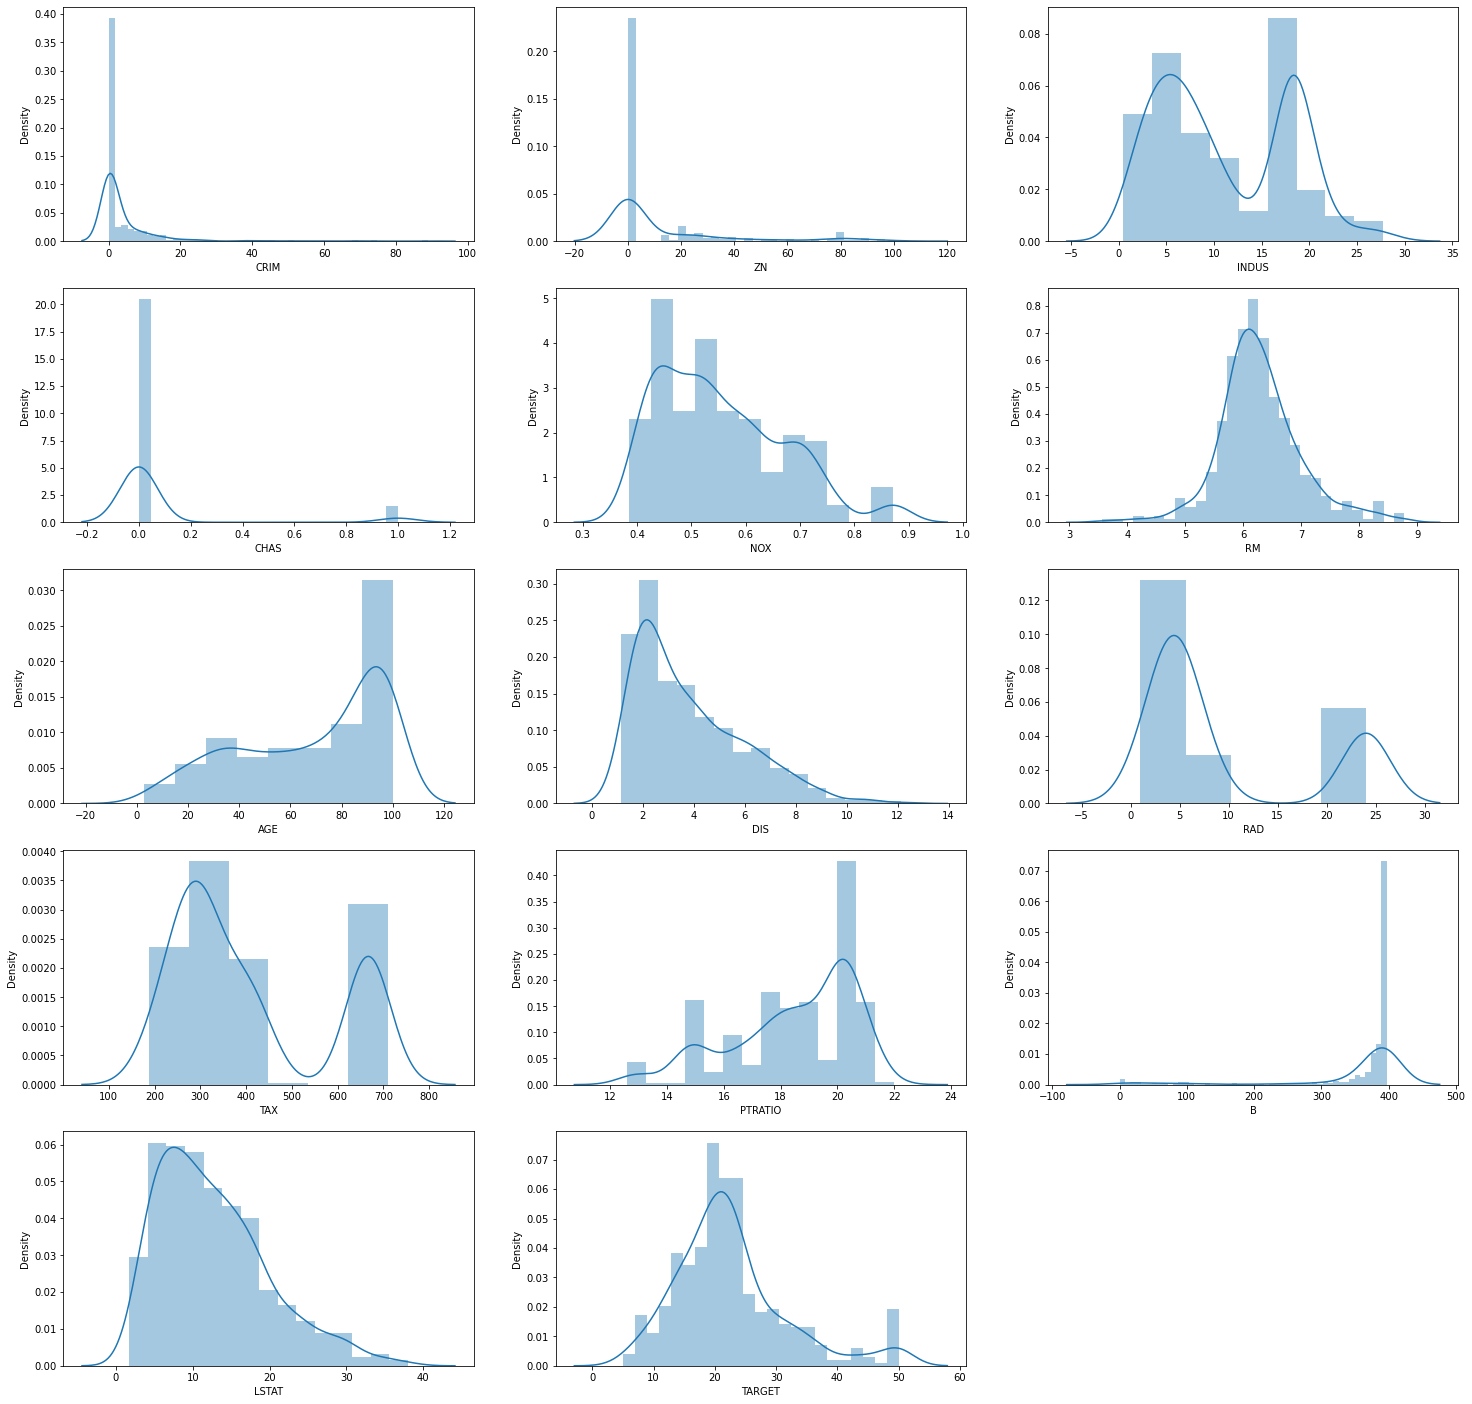

In [14]:
plt.figure(figsize=(25,25))
plotnumber=1

for features in df:
    if plotnumber <= 15:
        plt.subplot(5,3, plotnumber)
        sns.distplot(df[features])
        plt.xlabel(features)
    plotnumber+=1
plt.show()

In [15]:
# Writing list comprehensin to separate features without 0 value in it

features_wo_zero=[features for features in df.drop(columns='TARGET').columns if 0 not in df[features].unique()]
features_wo_zero

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

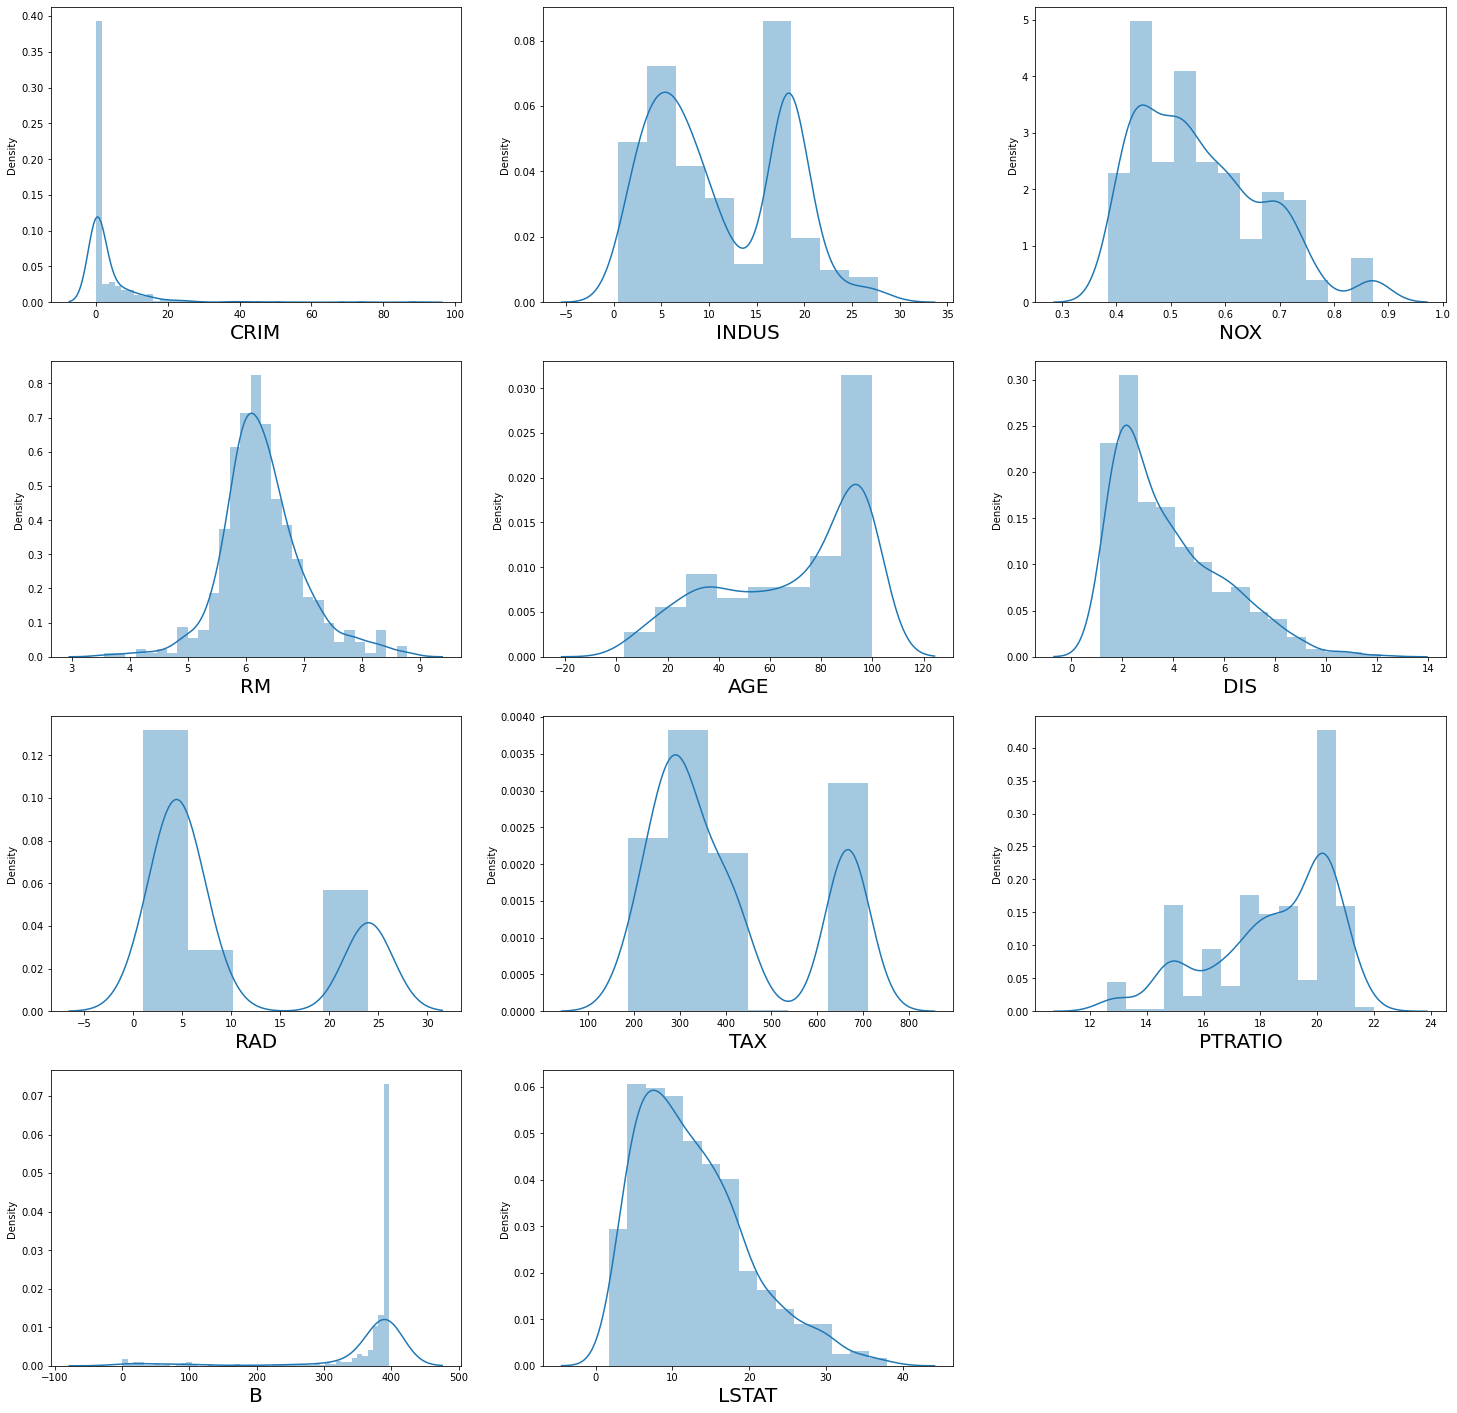

In [16]:
# Checking for distribution of features without 0 value in it.

plt.figure(figsize=(25,25))
plotnumber=1

for features in features_wo_zero:
    if plotnumber <= 12:
        plt.subplot(4,3, plotnumber)
        sns.distplot(df[features])
        plt.xlabel(features, fontsize=20)
    plotnumber+=1
plt.show()

In [17]:
#Making separate df for data summary to plot on boxplot

des=pd.DataFrame(df.describe())

In [18]:
des.drop(index='count', inplace=True) # Dropping count row

In [19]:
des

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

#### Using plotly to plot the boxplot on describe DF as it gives better info than plotting on df directly

In [21]:
df.iplot(kind='box', theme='solar', bestfit=True, keys=[i for i in des.columns if i not in ['TAX', 'B', 'CHAS', 'AGE']])

In [23]:
des.iplot(kind='box', margin=(0,0,0,0) ,theme='solar',keys=['TAX', 'B', 'CHAS', 'AGE'])

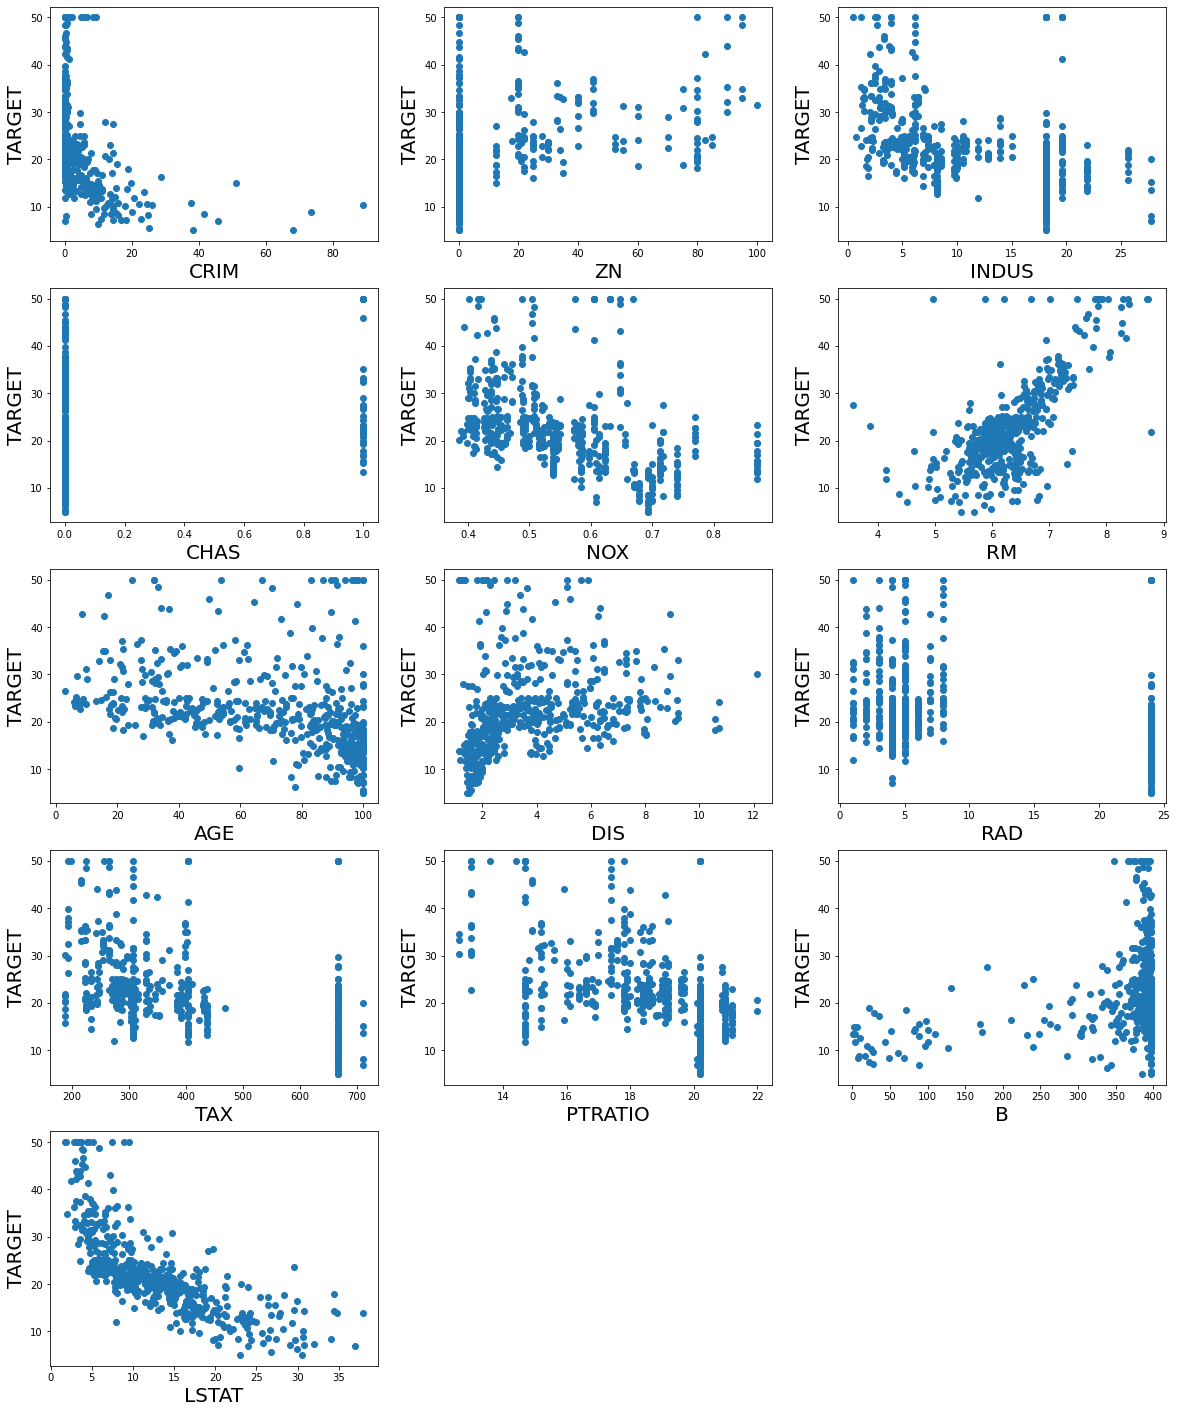

In [24]:
# Visualising the relationship between the INDEPENDENT features and how it affects the price using scatterplots


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(columns='TARGET'):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df[column], df['TARGET'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('TARGET',fontsize=20)
    plotnumber+=1
plt.show()

- From the above data we can visualize that the price is higher where the crime rate is low and also more houses on areas with low crime rate.
- The price is inversely realted with LSTAT, NOX. which means that the price is low where the population and nitric oxide concentration is less.
- The prices of houses are higher as per average rooms per dwelling.
- The new houses min cost starts from 20M and above however the old houses average cost is fairly lower and costs the least.
- Cost of house is hightest as with less distances to five Boston employment centres.


### Checking for correlations with the help of heatmap.

In [25]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

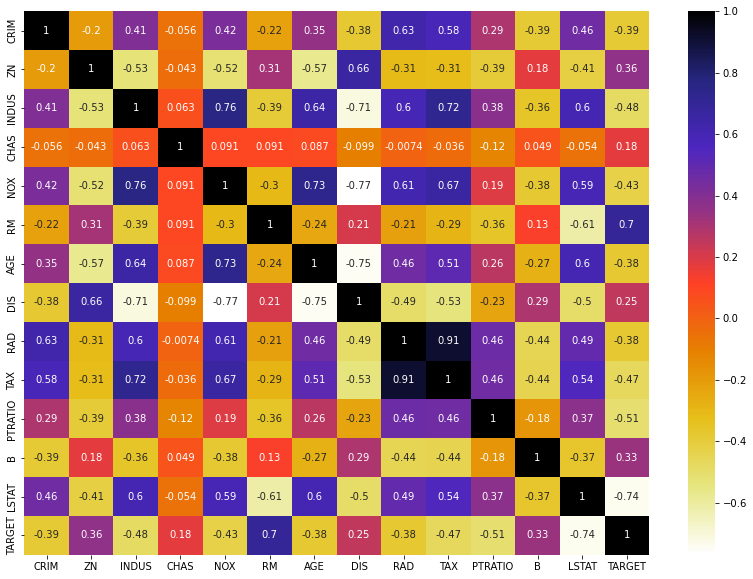

In [26]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r) 


**Observations**

- We can also see that TAX and RAD are highly correlated so we can drop either of the features if it is still correlated after peforming Feature Engineering.
- From the above heatmap we can see that RM has high postive correlation with the price which is 0.7
- And LSTAT has the highest negative correlation which is -0.74, followed by PTRATIO, INDUS, TAX, NOX

### First, let's find some more insights with postive correlated feature w.r.t. SalePrice and Charles River

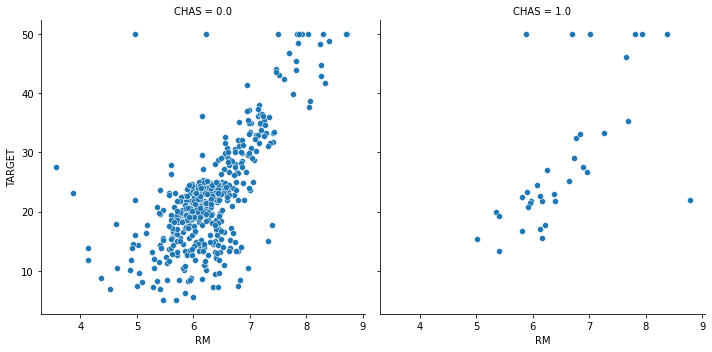

In [27]:
# Since no of rooms have high correlation with price, we are checking if it has any relation with Charles River

fig=sns.relplot(y=df['TARGET'], x=df['RM'], col=df['CHAS'])


**Observations**

- Hence, we can see that houses are lesser near the river.

- And irrespective of the house being closer to the river or not the house price is still higher as per the no of rooms.

- We can also see that the houses in CR have a minimum of 5 rooms.

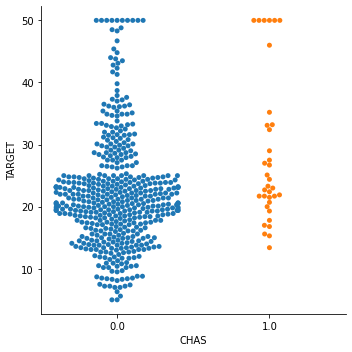

In [28]:
# From the above fig, we could not exactly see how the price is distribute hence the below visualization
# Checking how the price is distributed based on house being near Charles River 

sns.catplot(x="CHAS", y="TARGET", data=df, kind='swarm')

**Observations**

- We can see that the minimum cost of houses by the CR is more than houses away from Charler River.

<AxesSubplot:xlabel='RM', ylabel='TARGET'>

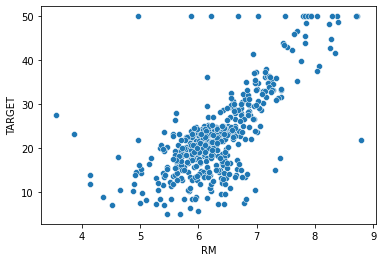

In [613]:
# Checking the relationship b/w RM and Price using scatterplot


sns.scatterplot(x=df['RM'], y=df['TARGET'])

<AxesSubplot:xlabel='RM', ylabel='TARGET'>

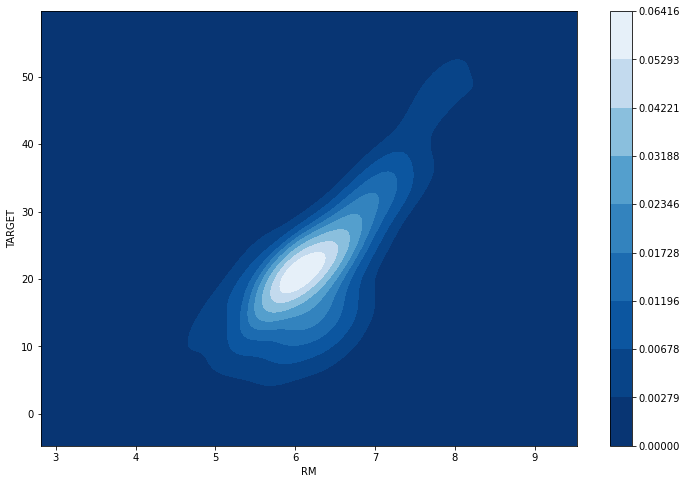

In [29]:
# Checking the relationship b/w RM and Price using KDE



plt.figure(figsize=(12,8))

sns.kdeplot(x='RM', y='TARGET', data=df, fill=True, cbar=True, cmap='Blues_r', thresh=0)


**Observations**

- From the above figure, we can see that kde is max b/w 5 1/2 and 6 1/2 average room per dwellings and the price being $ 18-25 M. We cannot conclude exactly the same way from scatterplot as it's more vague

### Now, we can go ahead and find some more insights with -ve correlated features using scatter plot.

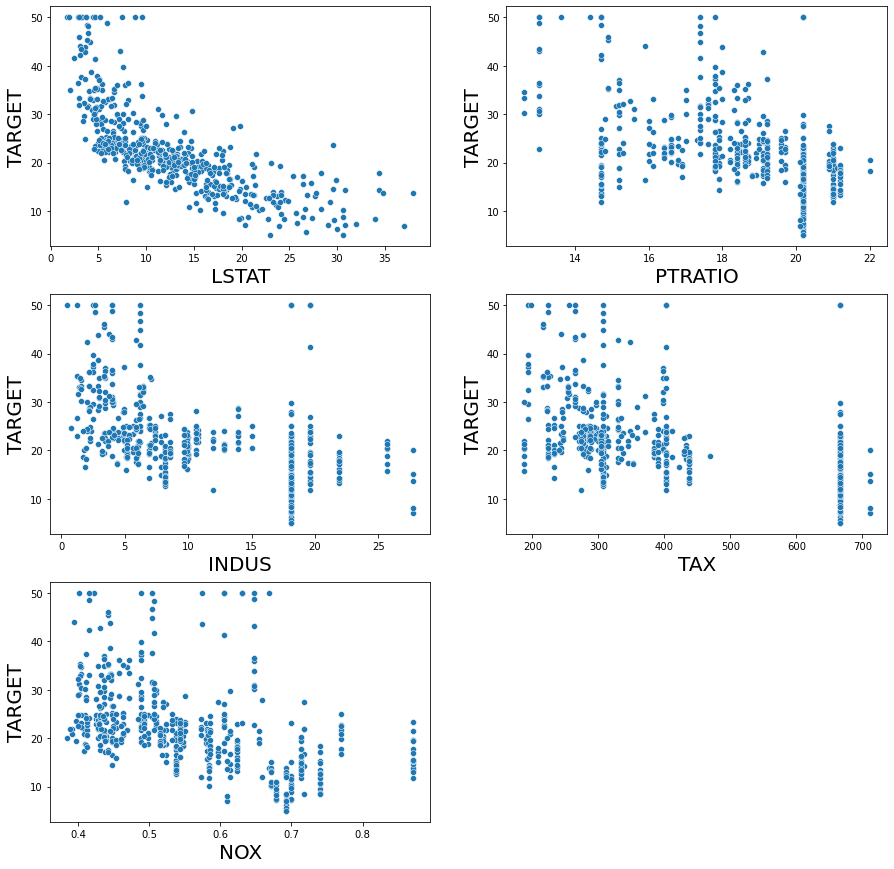

In [30]:
plt.figure(figsize=(15,15))
plotnumber=1

for i in df[['LSTAT','PTRATIO', 'INDUS', 'TAX', 'NOX']]:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(x=df[i], y=df['TARGET'])
        plt.xlabel(i, fontsize=20)
        plt.ylabel('TARGET', fontsize=20)
    plotnumber=plotnumber+1
plt.show()

**Observation**

- All the features above have inverse relationship, however LSTAT has the highest inverse relationship.

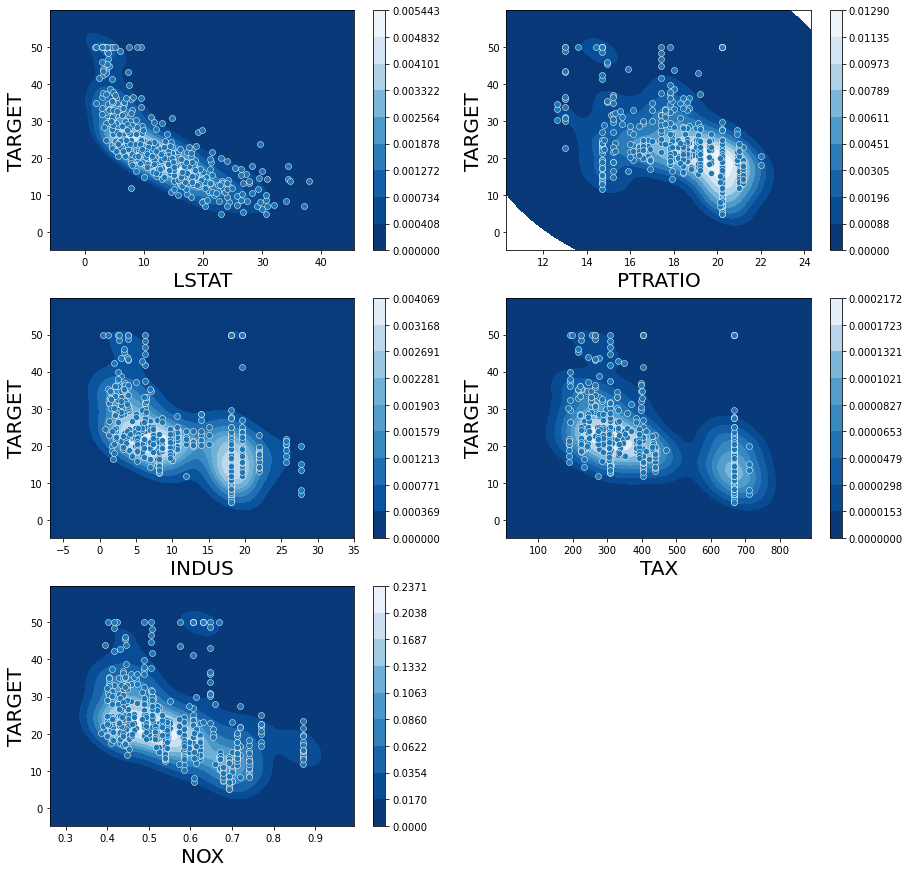

In [31]:
# Checking further with KDE and scatterplot altogether

plt.figure(figsize=(15,15))
plotnumber=1

for i in df[['LSTAT','PTRATIO', 'INDUS', 'TAX', 'NOX']]:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.kdeplot(x=df[i], y=df['TARGET'], fill=True, cbar=True, cmap='Blues_r', thresh=0)
        sns.scatterplot(x=df[i], y=df['TARGET'])
        plt.xlabel(i, fontsize=20)
        plt.ylabel('TARGET', fontsize=20)
    plotnumber=plotnumber+1
plt.show()

### Price range preditions using regression line

- Using lmplot as it helps us see how the data fits regression models.

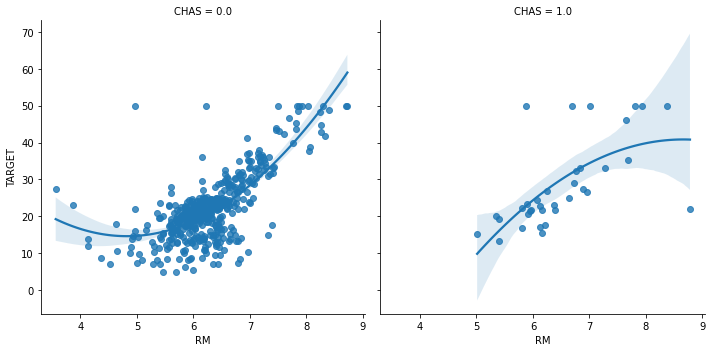

In [617]:
sns.lmplot(x='RM', y='TARGET', order=2, col='CHAS', data=df)

**Observations**

- As we can see that the shaded region is the 95% C.I. And the C.I. is larger closer to the river than the one away from the river.

#### Let us now see how data is distributed for every independent features

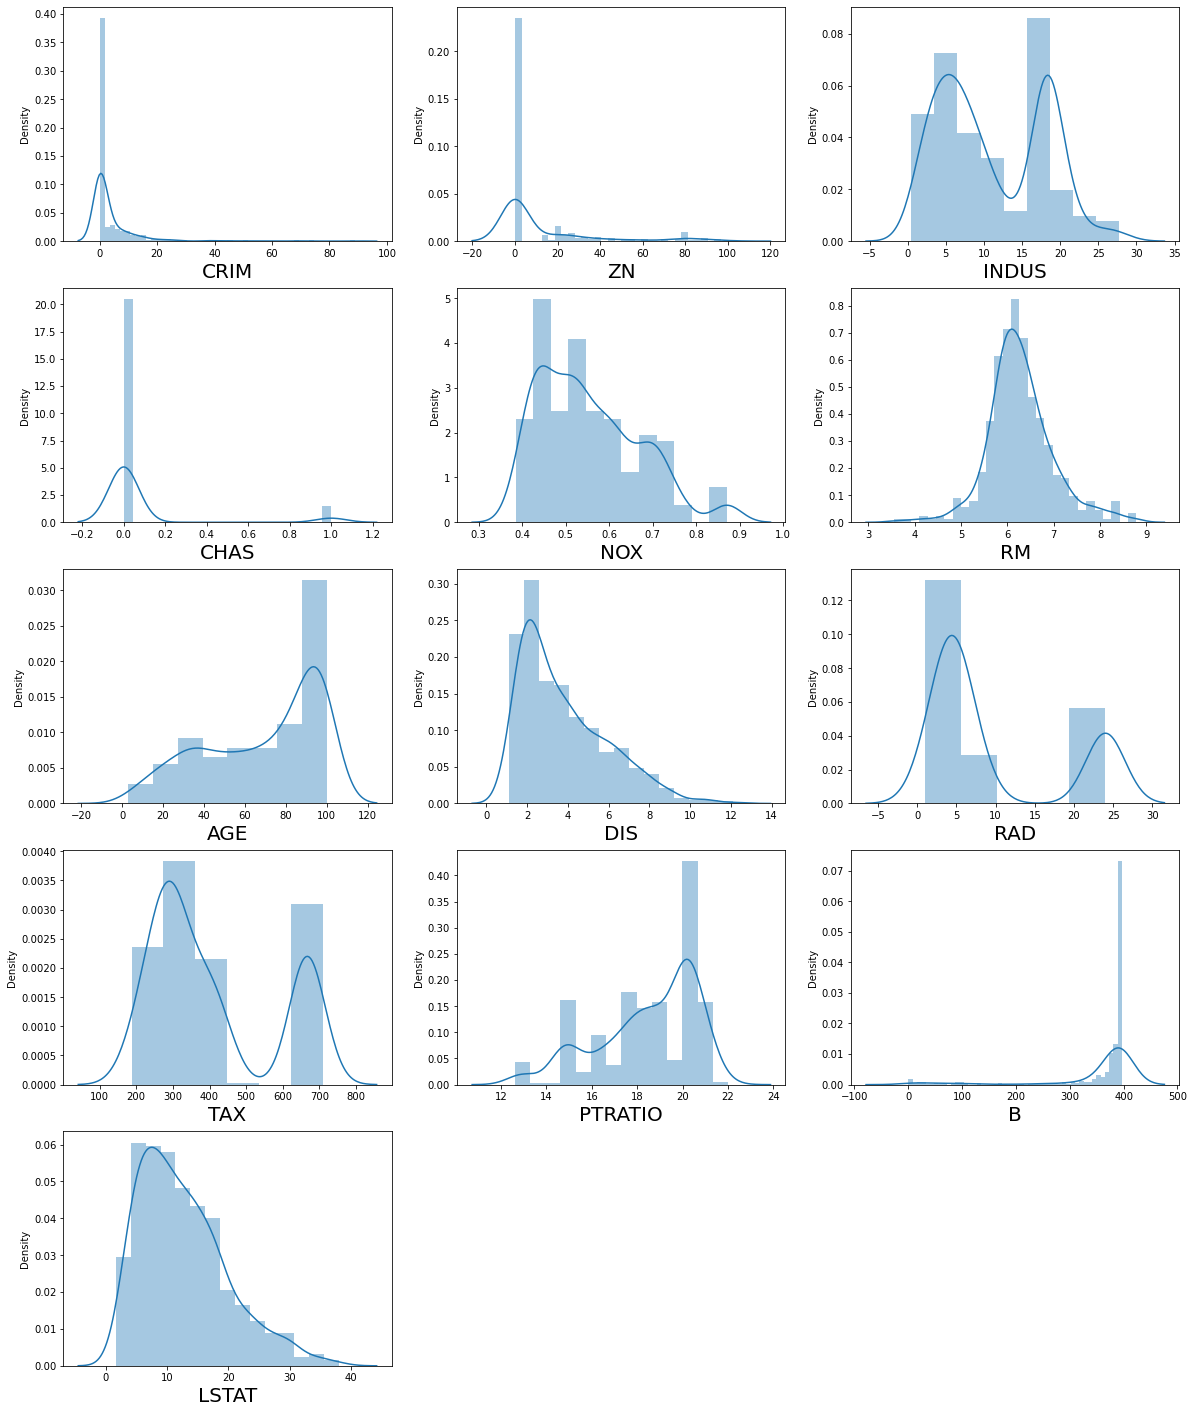

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(columns='TARGET'):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### Checking for outliers using boxplot

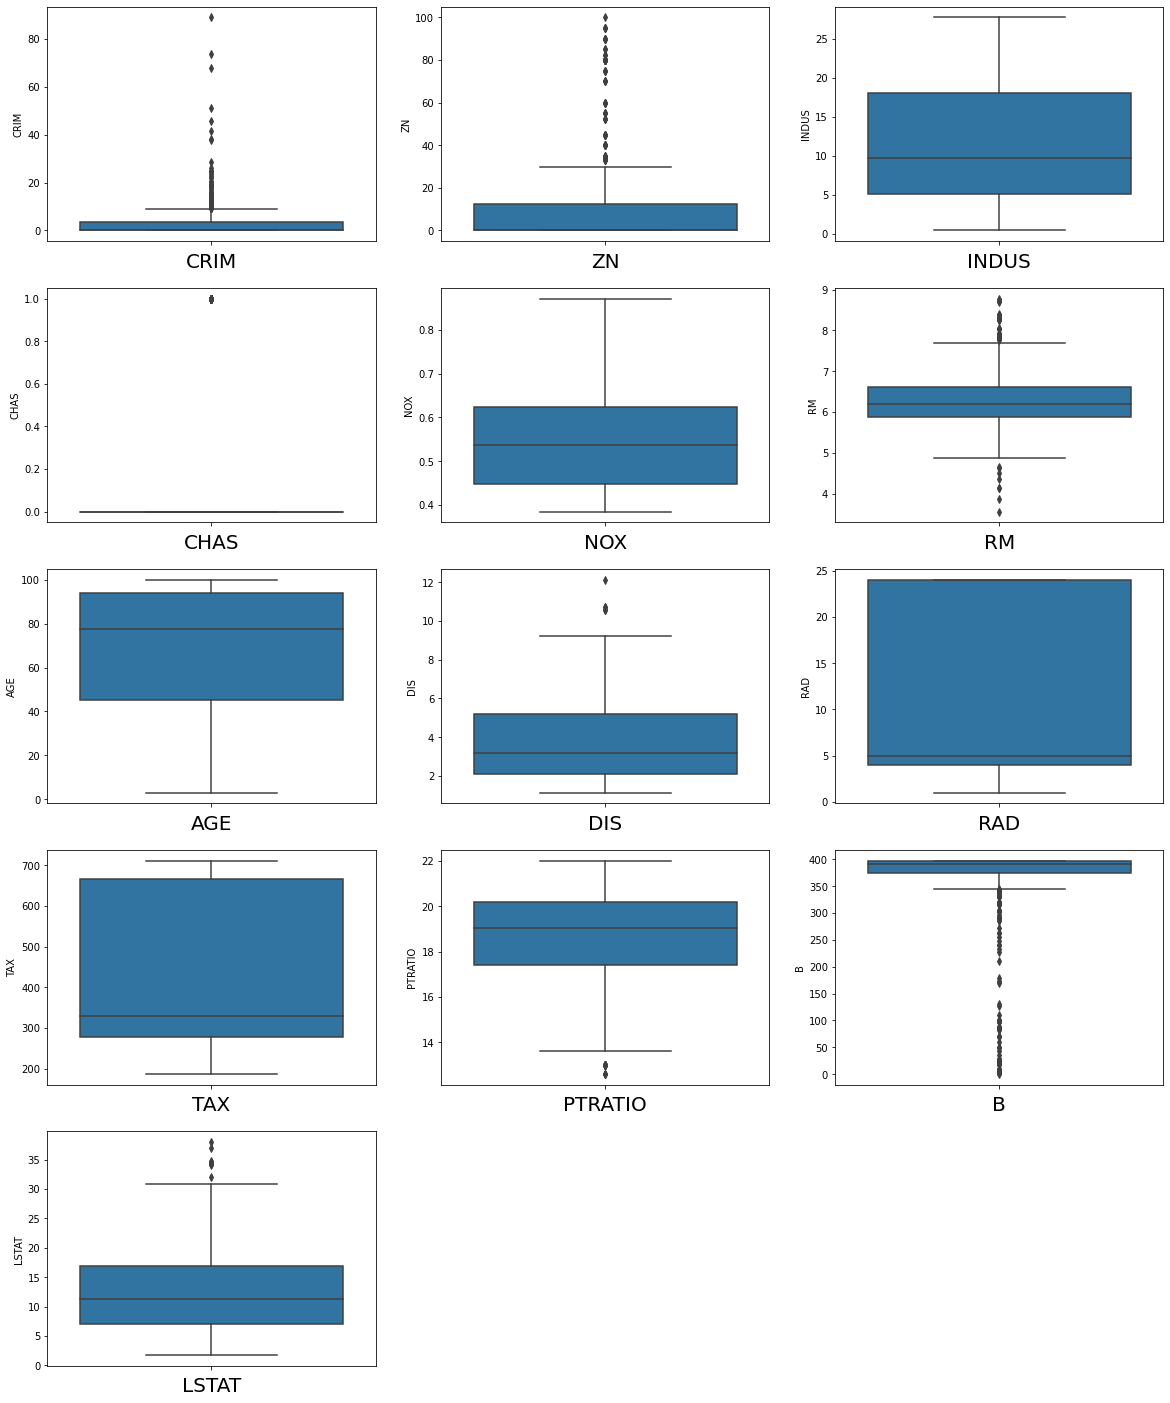

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(columns='TARGET'):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(y=df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

#### Observation

- As we, can see there are Outliers which will be treated while performing FE.

# 2. FEATURE ENGINEERING

#### In this data, after performing EDA, we will perform the below operations as per the analysis.

1. Check for distribution of data and see what kind of transformation is required.
2. Remove/Treat Outliers
3. Perform Train Test Split before scaling the data
4. Data Scaling

In [620]:
### Keeping a copy of original data before performing any transformation.

data=df.copy()

### 1. Handling data which does not follow normal distribution.

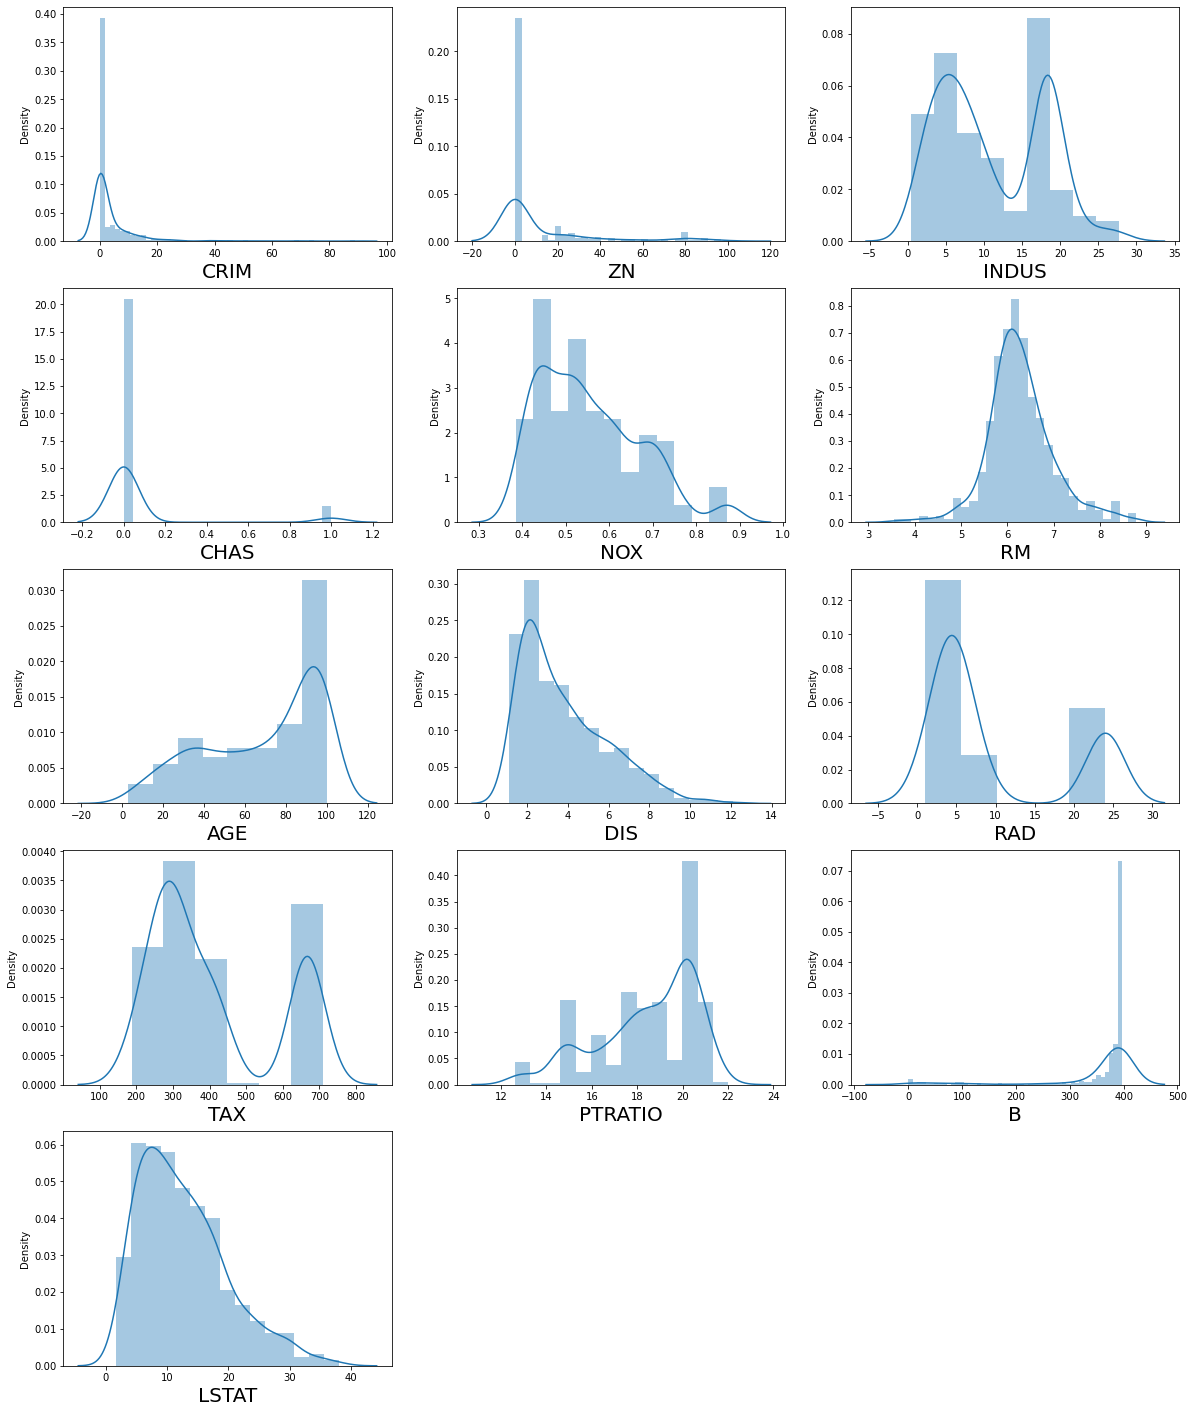

In [35]:
# Checking for distribution on entire data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(columns='TARGET'):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [622]:
# Writing a function to check for skewness and GD 

import scipy.stats as stat
import pylab 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    # code to plot histogram first
    plt.subplot(1,2,1)
    df[feature].plot.hist(bins=30)
    # code to plot qqplot second
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [36]:
# Creating a new dataframe only for features which do not have zero values in it since log transformation works
# well on features without 0 value in it.

df_wo_zero=pd.DataFrame(df[features_wo_zero])
df_wo_zero.head(2)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [37]:
# Converting all of above features to np.log to see if it converts to GD or not

for features in df_wo_zero:
    df_wo_zero[features+'LOG']=np.log(df_wo_zero[features])

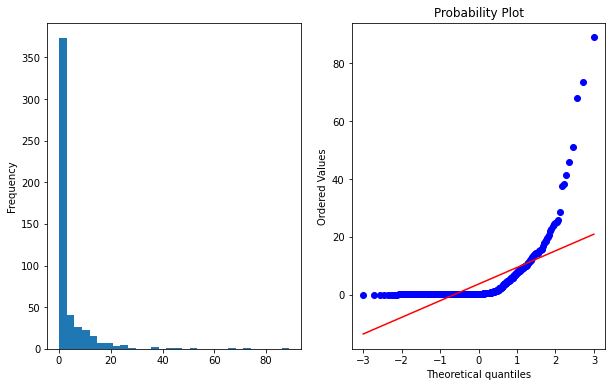

In [625]:
plot_data(df_wo_zero, 'CRIM')

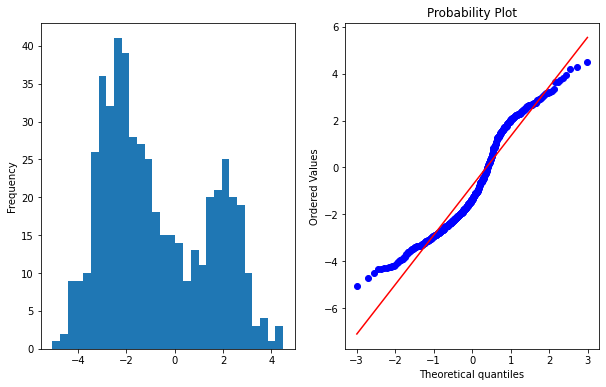

In [626]:
plot_data(df_wo_zero, 'CRIMLOG')

#### Obesevation

- After checking on every features, log transformation works well with the following features: CRIM, INDUS,	NOX,	DIS, RAD, TAX, LSTAT. Hence converting the following features to LND.

In [39]:
new=['CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']
new

['CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']

In [40]:
# Log transformation on features where it performs well.

for features in new:
    df[features]=np.log(df[features])

In [41]:
# The features have now been transformed

df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,-5.064036,18.0,0.837248,0.0,-0.619897,6.575,65.2,1.408545,0.000000,5.690359,15.3,396.9,1.60543,24.0
1,-3.600502,0.0,1.955860,0.0,-0.757153,6.421,78.9,1.602836,0.693147,5.488938,17.8,396.9,2.21266,21.6


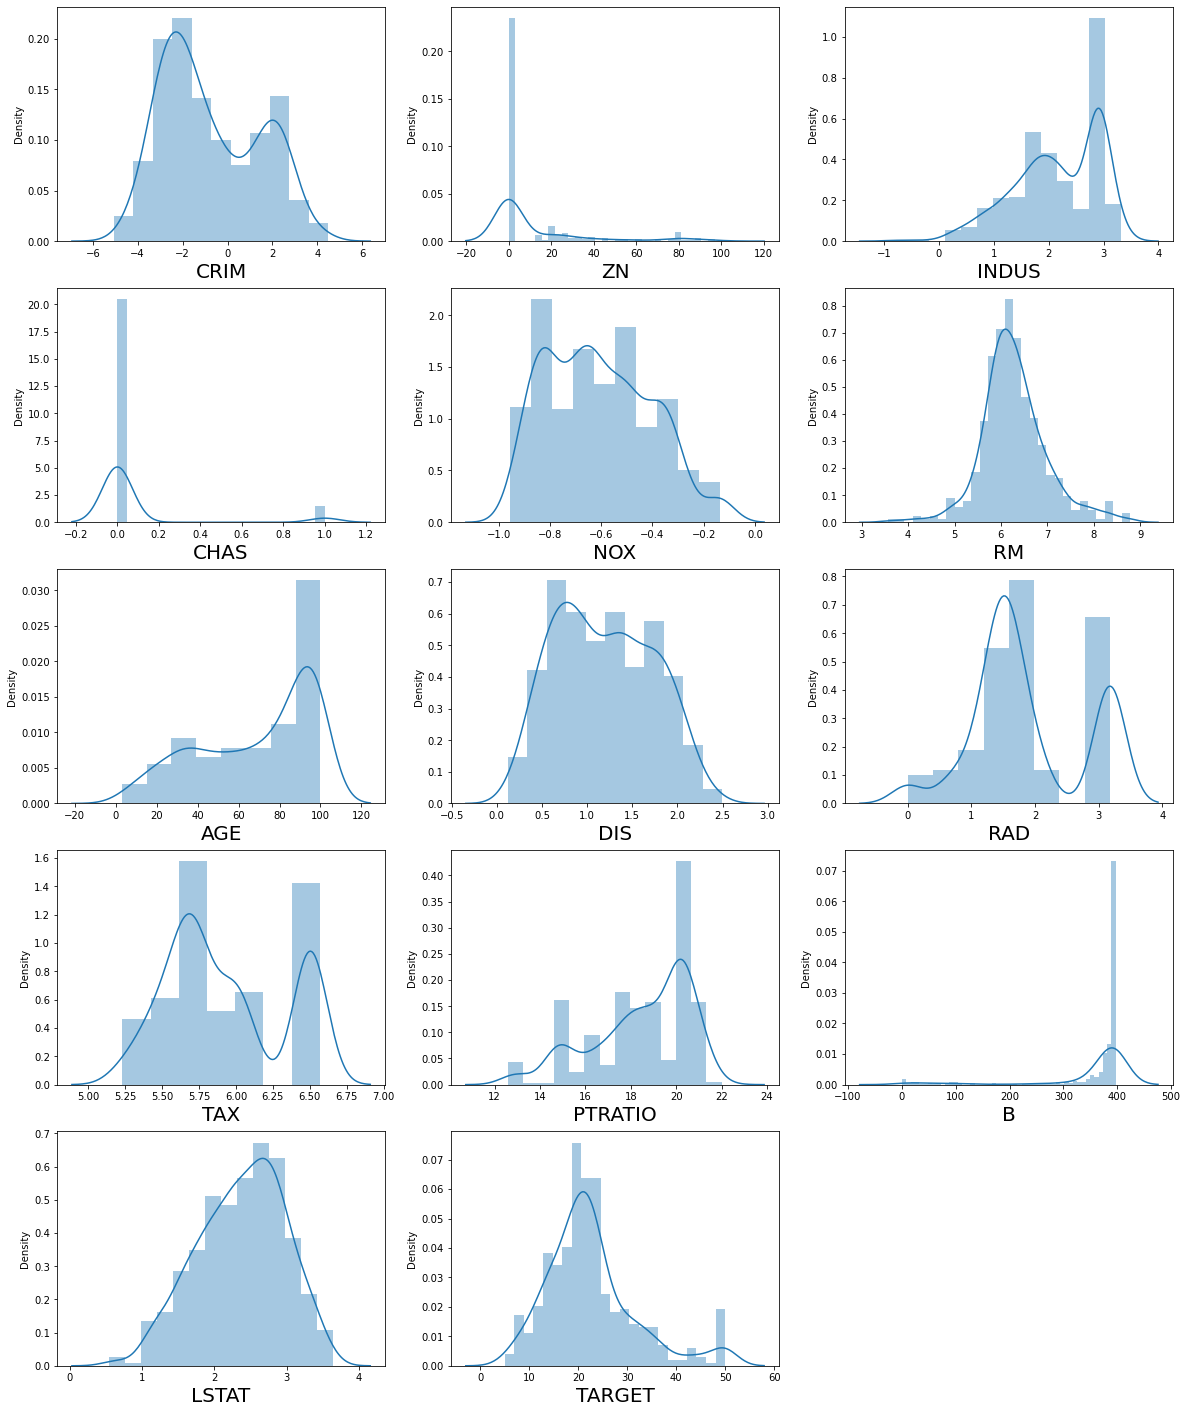

In [42]:
# Let us check the distribution of features again


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### 2. Treating Outliers

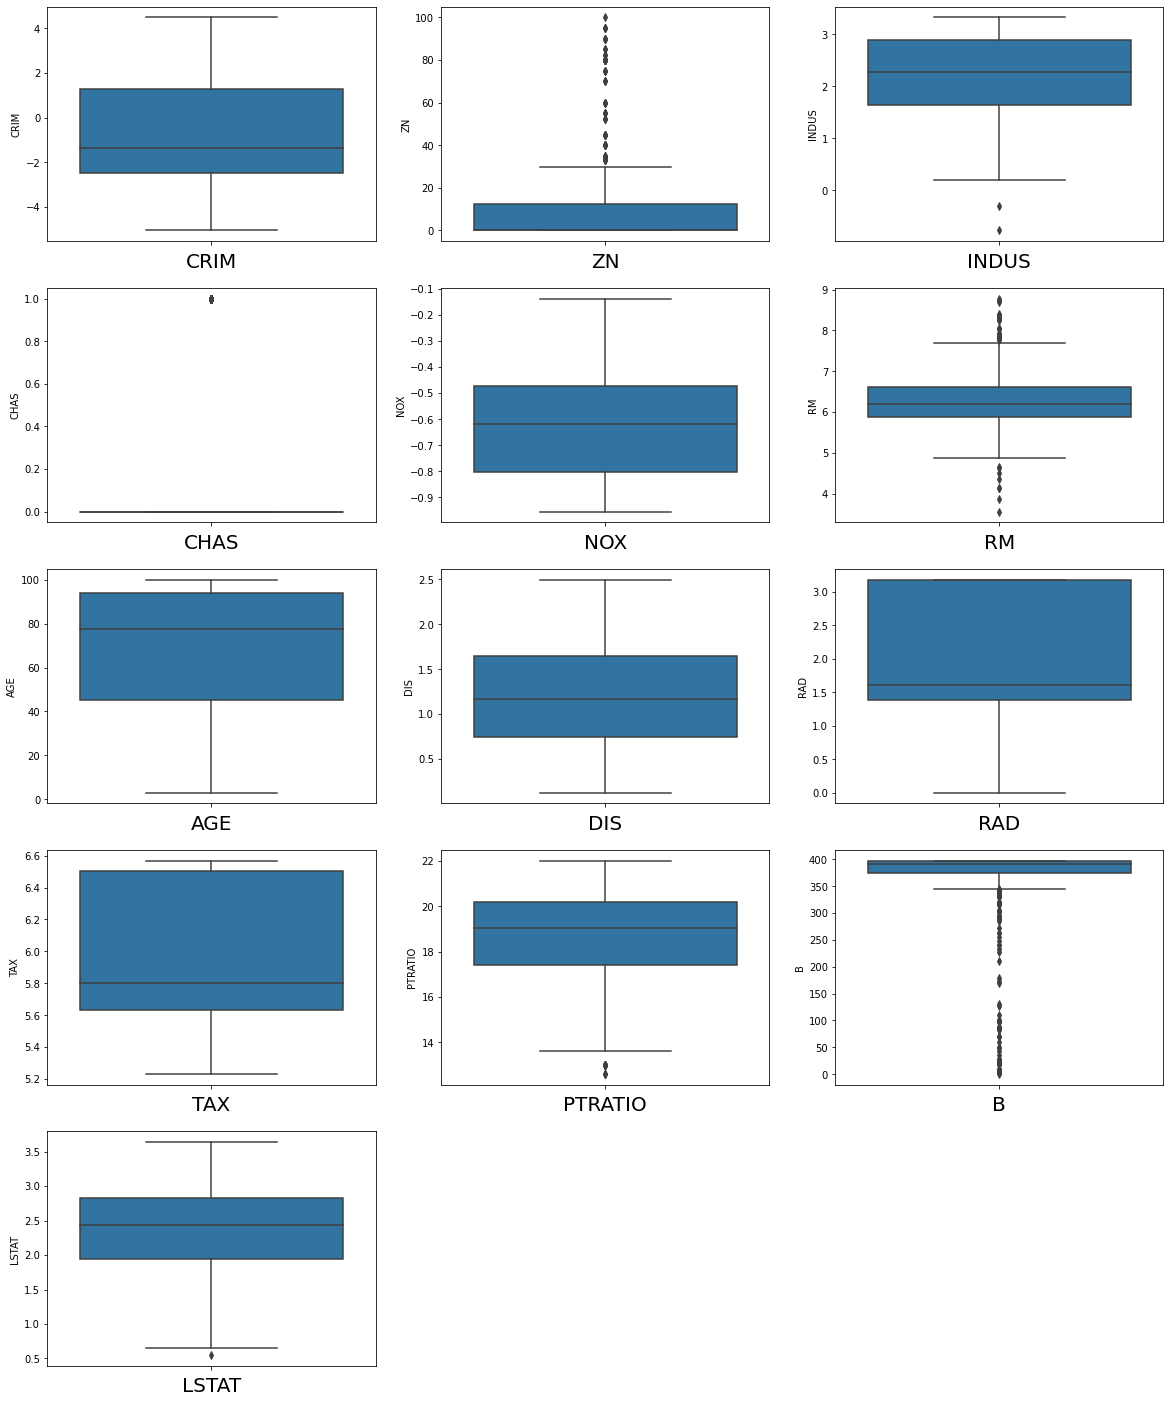

In [631]:
# Checking for Outliers.

# Using boxplot to check for Outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(columns='TARGET'):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(y=df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [632]:
# Making a new copy of dataframe

dataframe=df.copy()

In [43]:
# Since 'ZN', 'B', 'INDUS', 'PTRATIO' have skewed distribution we will use IQR to remove Outliers

for features in df[['ZN', 'B', 'INDUS', 'PTRATIO']]:
    
    Q1, Q3=df[features].quantile([0.25, 0.75])

    IQR=Q3-Q1

    LowerLimit=Q1-1.5 * IQR

    UpperLimit=Q3+1.5 * IQR
    
    df[features]=np.where(df[features]>UpperLimit, UpperLimit, df[features])
    df[features]=np.where(df[features]<LowerLimit, LowerLimit, df[features])



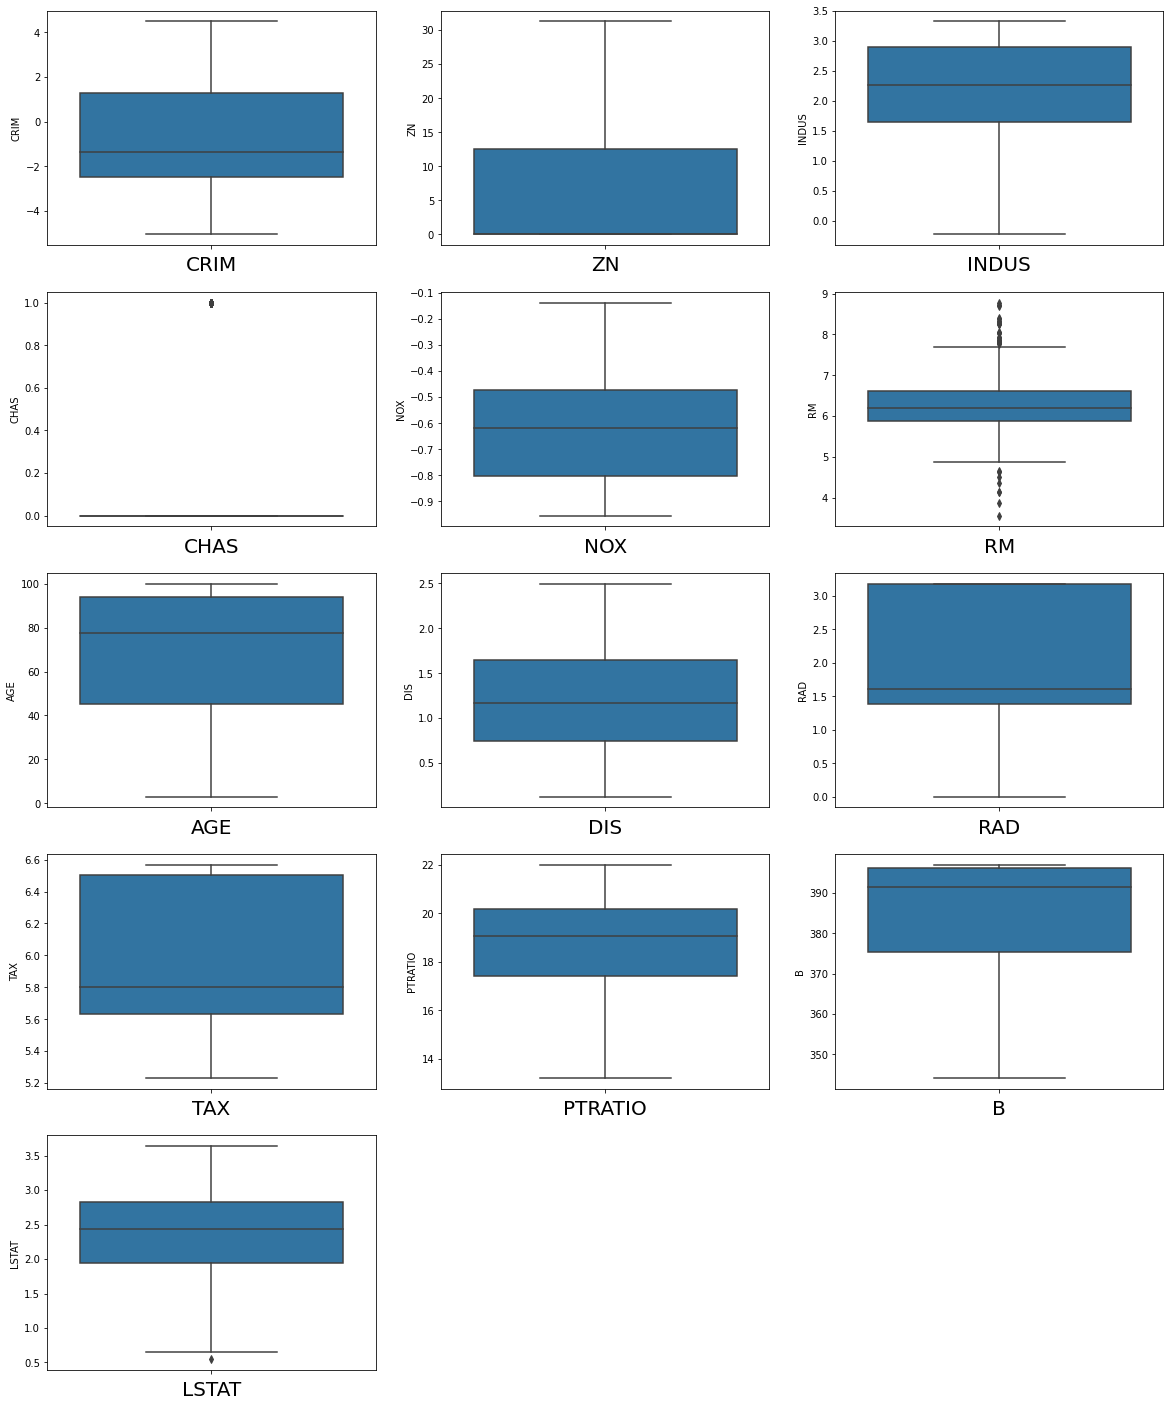

In [44]:
# Checking for Outliers again

# Using boxplot to check for Outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.drop(columns='TARGET'):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(y=df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

#### As we can see that the Outliers have been treated.

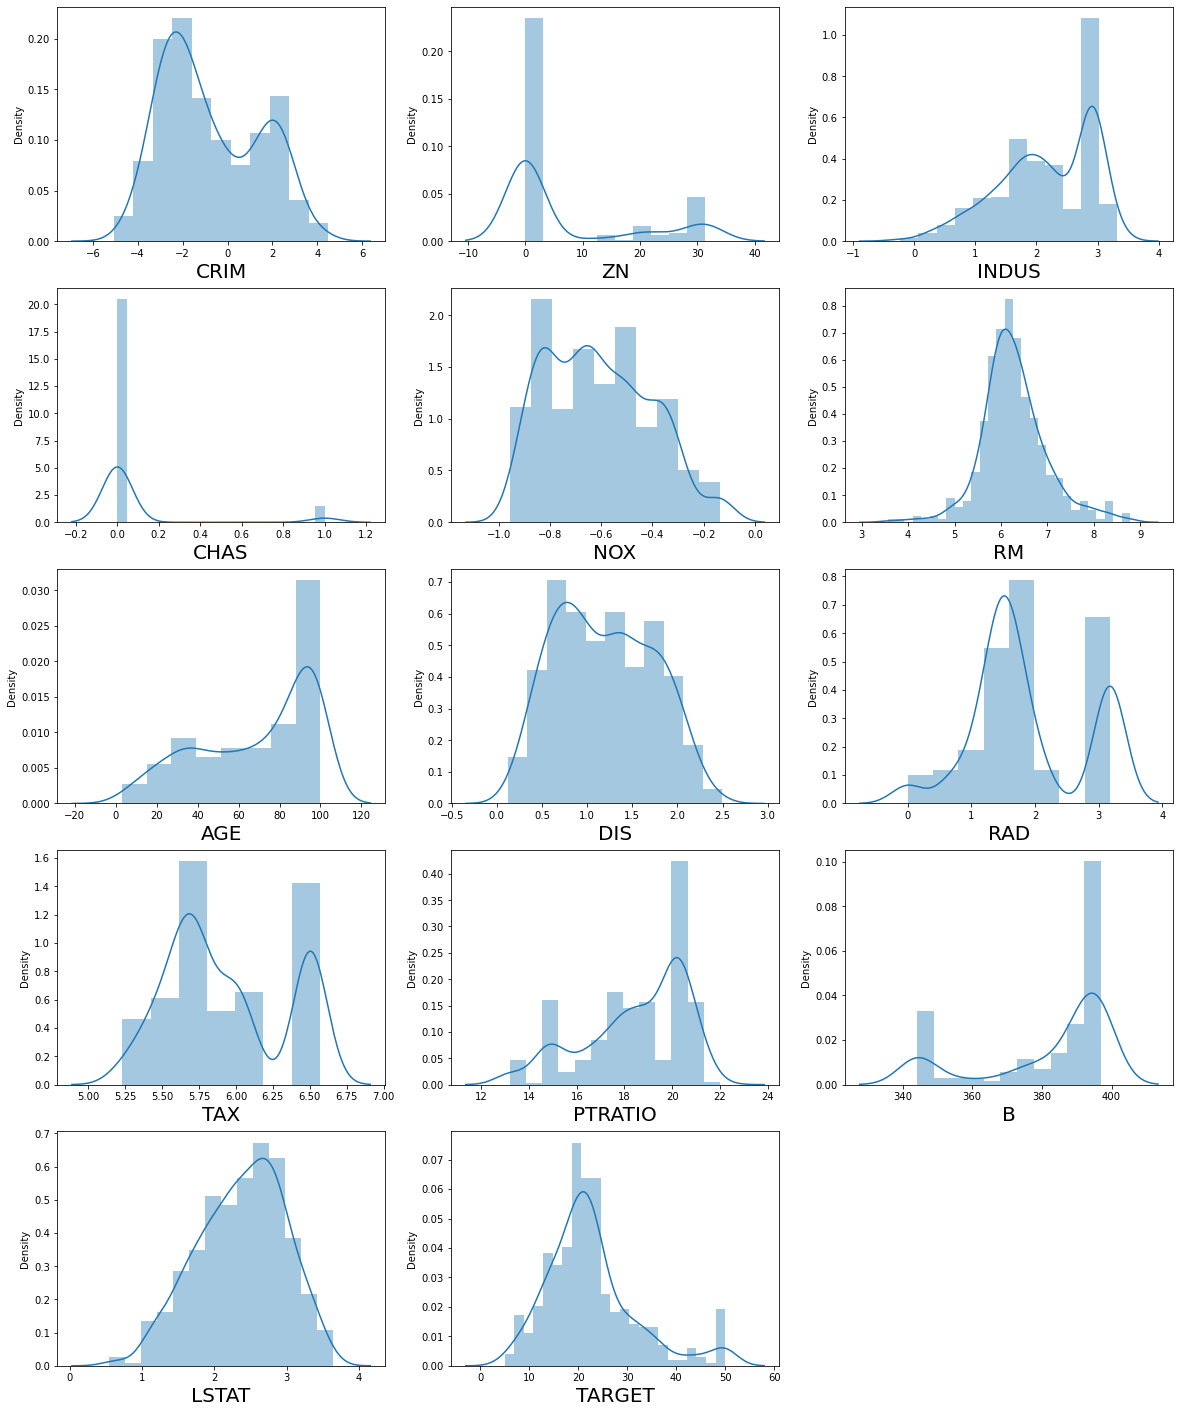

In [45]:
# Let us check the distribution of features again after treating Outliers


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### 3. Perform train and test split

In [46]:
# Separating dependent and independent features before performing train test split

X=df.drop(columns='TARGET')
y=df['TARGET']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42) 

X_train.shape, X_test.shape

((404, 13), (102, 13))

### 4. Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


# Scaling only the independent features
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# FEATURE SELECTION

**Using 3 different techiques for Feature Selection**

1. Check with Pearson Correlation first and keeping the threshold as 0.9

2. Then using SelectFromModel and using Lasso as base estimator for selecting features based on importance weights.

3. Checking VIF with threshold as 10. 

### 1. Pearson Correlation 

<AxesSubplot:>

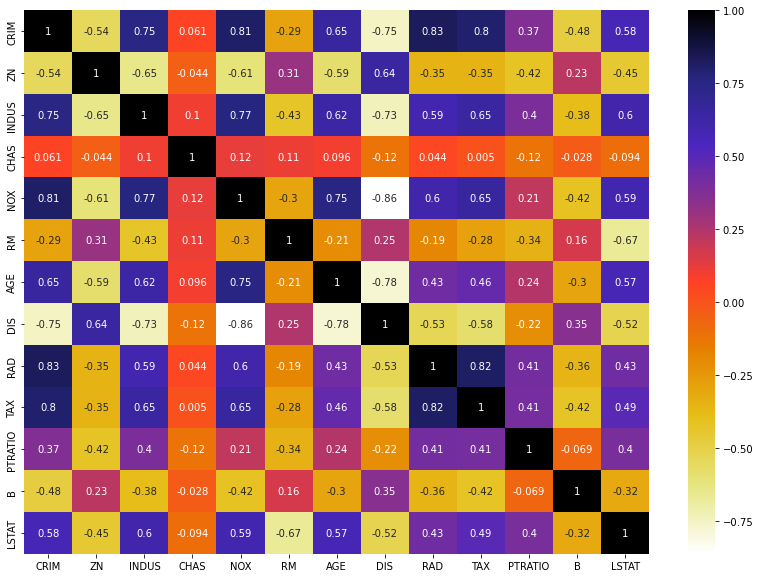

In [48]:
# Check correlation on X_train data(not on scaled data) using Pearson Correlation

plt.figure(figsize=(14,10))

sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap_r) 

In [49]:
# Writing a function so we can select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
# Keeping the threshold as 0.9 for corrrelation

co_features=correlation(X_train, 0.9)
co_features

set()

##### With threshold as 0.9, none of the features are correlated.

### 2. SelectFromModel using Lasso

In [54]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [55]:
# Creating a dataframe to fit to SelectFromModel as model doesn't take array type

x_df=pd.DataFrame(X_train_scaled)
y_df=pd.DataFrame(y_train)

In [57]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))  
feature_sel_model.fit(x_df, y_df) #it only takes dataframe format

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [58]:
# Checking for features to be used for model.

feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [61]:
# let's print the number of total and selected features

selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats

print(f'total features: {(X_train.shape[1])}')
print(f'selected features: {len(selected_feat)}')
print(f'Name of Selected features: {selected_feat}')

total features: 13
selected features: 13
Name of Selected features: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


### CHECKING VIF

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_train_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, adding col with features names
vif["FEATURES"] = X.columns

In [65]:
# Keeping the threshold as 10 for VIF

vif

,VIF,FEATURES
0,7.677835,CRIM
1,2.397546,ZN
2,3.644635,INDUS
3,1.093478,CHAS
4,6.123140,NOX
5,2.142401,RM
6,3.296334,AGE
7,5.164379,DIS
8,4.696659,RAD
9,4.046647,TAX


##### Since, the VIF is below 10 for all features, we are good to go.

#### Observation

- After performing all the tests for Feature Selection, the features need not be removed. And, also model performs better when the threshold for corr is 0.9 than 0.8 as 0.8 requires to remove some features which does not perform well at the time of model creation.

# MODEL CREATION

**We will use the following different models, perform CV and see which one works better on this dataset**

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. EleasticNet Regression
5. RandomForest Regression (We will use both RandomizedSearchCV and GridSearchCV for hyperparameter tuning)

#### 1. Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [69]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(normalize=True)

In [70]:
# Score on test data

lin_reg.score(X_test_scaled, y_test)

0.7549897498813202

In [71]:
# Score on train data

lin_reg.score(X_train_scaled, y_train)

0.7932977997898587

In [72]:
# Performing cross validation

from sklearn.model_selection import cross_val_score, cross_val_predict

In [73]:
from sklearn.model_selection import KFold

kfold=KFold()

In [77]:
# Cross validation on train data

print(f'Score of 5 different cross val: {cross_val_score(lin_reg, X_train_scaled, y_train, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(lin_reg, X_train_scaled, y_train, cv=kfold).mean()}')

Score of 5 different cross val: [0.77724309 0.73754361 0.83615413 0.82540366 0.66462657]
Mean of cross val: 0.7681942142032258


In [78]:
# Cross validation on test data

print(f'Score of 5 different cross val: {cross_val_score(lin_reg, X_test_scaled, y_test, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(lin_reg, X_test_scaled, y_test, cv=kfold).mean()}')

Score of 5 different cross val: [0.76860973 0.37774313 0.79947415 0.82197471 0.06716885]
Mean of cross val: 0.5669941146155911


#### Obervation

- Since the data is suffering from overfitting issues, we shall try with Ridge, Lasso and ElasticNet.

#### 2. Lasso Regression

In [80]:
from sklearn.linear_model  import  Lasso, LassoCV

In [81]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train_scaled, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [82]:
# Best alpha value

alpha=lasscv.alpha_
alpha

0.0014213287348920972

In [86]:
# Fitting to model

lasso_reg=Lasso(alpha=alpha)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.0014213287348920972)

In [87]:
# Score on train data

lasso_reg.score(X_train_scaled, y_train)

0.7932967345026134

In [91]:
# Score on test data

lasso_reg.score(X_test_scaled, y_test)

0.7549353640415181

In [89]:
# Cross validation on train data

print(f'Score of 5 different cross val: {cross_val_score(lasso_reg, X_train_scaled, y_train, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(lasso_reg, X_train_scaled, y_train, cv=kfold).mean()}')

Score of 5 different cross val: [0.77720552 0.737572   0.83616497 0.82543144 0.66468147]
Mean of cross val: 0.7682110803963187


In [90]:
# Cross validation on test data

print(f'Score of 5 different cross val: {cross_val_score(lasso_reg, X_test_scaled, y_test, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(lasso_reg, X_test_scaled, y_test, cv=kfold).mean()}')

Score of 5 different cross val: [0.76950343 0.3810423  0.79989021 0.82174379 0.0671019 ]
Mean of cross val: 0.5678563282114213


#### 3.  Ridge Regression

In [92]:
from sklearn.linear_model  import Ridge, RidgeCV

In [94]:
# Generating multiple alphas to get the best one

alphas = np.random.uniform(low=0, high=10, size=(50,))
alphas

array([3.77511705, 7.34658581, 4.20967966, 4.06600413, 3.28217791,
       2.36601017, 1.68593804, 8.77847903, 9.96464199, 3.95458911,
       3.88876454, 4.14678912, 6.6855161 , 0.5471792 , 7.91728821,
       9.35204799, 0.80104088, 4.19662364, 2.46917958, 8.45164344,
       2.58854396, 0.10620843, 6.43381134, 3.69786649, 1.95178284,
       5.2919905 , 1.57445561, 0.1888156 , 7.14833519, 7.85383037,
       4.02242223, 5.43717695, 8.79143572, 5.96066869, 8.14471367,
       0.80259662, 9.94776136, 5.40341128, 6.82910621, 0.43435245,
       6.18594711, 6.04129261, 9.69920826, 2.96388081, 1.33121492,
       3.52355484, 0.49336658, 9.58123049, 2.12875169, 0.08268348])

In [95]:
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train_scaled, y_train)
best_alpha=ridgecv.alpha_
best_alpha

0.08268348203968712

In [96]:
ridge_reg=Ridge(best_alpha)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=0.08268348203968712)

In [99]:
# Score on train data

ridge_reg.score(X_train_scaled, y_train)

0.7932977103210019

In [100]:
# Score on test data

ridge_reg.score(X_train_scaled, y_train)

0.7932977103210019

In [101]:
# Cross validation on train data

print(f'Score of 5 different cross val: {cross_val_score(ridge_reg, X_train_scaled, y_train, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(ridge_reg, X_train_scaled, y_train, cv=kfold).mean()}')

Score of 5 different cross val: [0.77725721 0.7374896  0.83614355 0.82546042 0.66465047]
Mean of cross val: 0.7682002507447991


In [102]:
# Cross validation on test data

print(f'Score of 5 different cross val: {cross_val_score(ridge_reg, X_test_scaled, y_test, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(ridge_reg, X_test_scaled, y_test, cv=kfold).mean()}')

Score of 5 different cross val: [0.7706098  0.38453022 0.80091832 0.82171796 0.06543519]
Mean of cross val: 0.568642298036381


#### 4. ElasticNet

In [104]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [105]:
elasticCV=ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train_scaled, y_train)

ElasticNetCV(cv=10)

In [106]:
# Best Alpha Value
elastic_alpha=elasticCV.alpha_
elastic_alpha

0.02151160378674489

In [107]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2

elasticCV.l1_ratio


0.5

In [108]:
elastic_reg=ElasticNet(alpha=elastic_alpha, l1_ratio=0.5)
elastic_reg.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.02151160378674489)

In [109]:
# Score on train data

elastic_reg.score(X_train_scaled, y_train)

0.7928720894272174

In [110]:
# Score on test data

elastic_reg.score(X_test_scaled, y_test)

0.7531568363141365

In [111]:
# Cross validation on train data

print(f'Score of 5 different cross val: {cross_val_score(elastic_reg, X_train_scaled, y_train, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(elastic_reg, X_train_scaled, y_train, cv=kfold).mean()}')

Score of 5 different cross val: [0.7771238  0.73525437 0.83510104 0.82748598 0.66570326]
Mean of cross val: 0.7681336894456491


In [112]:
# Cross validation on test data

print(f'Score of 5 different cross val: {cross_val_score(elastic_reg, X_test_scaled, y_test, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(elastic_reg, X_test_scaled, y_test, cv=kfold).mean()}')

Score of 5 different cross val: [0.79198728 0.45851586 0.81506158 0.8170764  0.04850727]
Mean of cross val: 0.5862296769291394


#### Observation

- So, we can see by using different type of regularization, we still are getting the same r2 score for train data and test data. However the mean score for test data is very less as compard to train score. Hence there is an overfitting issue.

### 5. RandomForest Classifier with HyperParameter Tuning

1. RandomizedSearchCV
2. GridSearchCV

### RandomizedSearchCV

In [113]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

##### Defining the parameters for RandomizedSearchCV

In [116]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # int as it gives float value 
# Function to measure the quality of a split.
criterion=['mse', 'mae']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [4, 3, 2, 6, 8, 9, 5, 1, 3, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [4, 3, 2, 6, 8, 9, 5, 1, 3, 6], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [117]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1) #n_iter only in RandomizedSearchCV

### fit the randomized model to train data without scaling
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.8s
/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [4, 3, 2, 6, 8, 9,
                                                              5, 1, 3, 6],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                

In [119]:
# displays in key value pair

rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 230,
 'criterion': 'mae'}

In [120]:
# displays the best parameters

rf_randomcv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=230, max_features='log2',
                      min_samples_split=3, n_estimators=1000)

In [121]:
rf_model=RandomForestRegressor(criterion='mae', max_depth=230, max_features='log2',min_samples_leaf=1,
                      min_samples_split=3, n_estimators=1000)
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=230, max_features='log2',
                      min_samples_split=3, n_estimators=1000)

In [122]:
# Score on train data

rf_model.score(X_train, y_train)

0.9760573523291718

In [123]:
# Score on test data

rf_model.score(X_test, y_test)

0.8551086839848938

In [131]:
# Cross validation on train data(RF does not require scaling hence using uncaled data)

print(f'Score of 5 different cross val: {cross_val_score(rf_model, X_train, y_train, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(rf_model, X_train, y_train, cv=kfold).mean()}')

Score of 5 different cross val: [0.8560947  0.82549638 0.86338556 0.89188697 0.75971702]
Mean of cross val: 0.8379089359150285


In [132]:
# Cross validation on test data(RF does not require scaling hence using uncaled data)

print(f'Score of 5 different cross val: {cross_val_score(rf_model, X_test, y_test, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(rf_model, X_test, y_test, cv=kfold).mean()}')

Score of 5 different cross val: [0.89884872 0.78997856 0.87363271 0.84633998 0.03156599]
Mean of cross val: 0.6881735023467018


#### Observation

- The best model so far is RandomForest after performing hyperparameter tuning

### GridSearchCV

##### Defining the parameters for GridSearchCV by deriving from RandomizedSearchCV

In [127]:

from sklearn.model_selection import GridSearchCV

# You can enter number manually instead

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']], #you can also type 'mae'
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['mae'], 'max_depth': [230], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'n_estimators': [800, 900, 1000, 1100, 1200]}


In [128]:
#### Fit the grid_search to the data
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._disp

  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyth

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min


[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=560, criterion=mae 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=560, criterion=mae, total=   0.5s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=mae 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=mae, total=   4.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=120, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=120, criterion=mae, total=   6.8s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=780, criterion=mse, total=   1.0s
[CV] n_estimators=600, min_samples

[CV]  n_estimators=200, min_samples_split=3, min_samples_leaf=8, max_features=sqrt, max_depth=560, criterion=mae, total=   0.5s[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=560, criterion=mae 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=560, criterion=mae, total=   0.6s
[CV] n_estimators=2000, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=890, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=890, criterion=mse, total=   3.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=10, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=10, criterion=mae, total=   2.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, min_sample

[CV]  n_estimators=800, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=340, criterion=mae, total=   5.3s[CV] n_estimators=1600, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=mse, total=   2.0s
[CV] n_estimators=2000, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=890, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=890, criterion=mse, total=   3.8s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=1, max_features=log2, max_depth=670, criterion=mse 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=1, max_features=log2, max_depth=670, criterion=mse, total=   0.8s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, min_sa

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=10, criterion=mae, total=   1.5s[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=340, criterion=mse 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=340, criterion=mse, total=   0.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=mae 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=mae, total=   4.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1000, criterion=mse, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=1000, criterion=mse 
[CV]  n_estimators=200, min_samples

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

[CV] n_estimators=1600, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=mse, total=   2.0s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=mse, total=   0.7s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=mse, total=   0.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=10, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=10, criterion=mae, total=   2.6s
[CV] n_estimators=800, min_sampl

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=560, criterion=mae 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=560, criterion=mae, total=   0.6s
[CV] n_estimators=2000, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=890, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=890, criterion=mse, total=   3.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=120, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=120, criterion=mae, total=   7.1s
[CV] n_estimators=1600, min_samples_split=6, min_samples_leaf=4, max_features=log2, max_depth=890, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=6, min_samples_leaf=4, max_features=log2, max_depth=890, criterion=mse, total=   2.0s
[CV] n_estimators=1200, min_sa

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, total=   0.4s[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=340, criterion=mse 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=340, criterion=mse, total=   0.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=mae 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=8, max_features=auto, max_depth=670, criterion=mae, total=   4.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=120, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=120, criterion=mae, total=   7.0s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=600, min_sample

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=900, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=1, max_features=log2, max_depth=450, criterion=mse 
[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=1, max_features=log2, max_depth=450, criterion=mse, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=1, max_features=log2, max_depth=450, criterion=mse 
[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=1, max_features=log2, max_depth=450, criterion=mse, total=   0.4s
[CV] n_estimators=1600, min_samples_split=3, min_samples_leaf=8, max_features=log2, max_depth=340, criterion=mae 
[CV]  n_estimators=1600, min_samples_split=3, min_samples_leaf=8, max_features=log2, max_depth=340, criterion=mae, total=   3.9s
[CV] n_estimators=800, min_samples_split=9, min_samples_leaf=4, max_features=log2, max_depth=340, criterion=mae 
[CV]  n_estimators=800, min_sa

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.8min


[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=340, criterion=mse 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=340, criterion=mse, total=   0.2s
[CV] n_estimators=1600, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=mse 
[CV]  n_estimators=1600, min_samples_split=8, min_samples_leaf=2, max_features=sqrt, max_depth=1000, criterion=mse, total=   2.1s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=mse 
[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=mse, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=10, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=6, max_features=log2, max_depth=10, criterion=mae, total=   2.6s
[CV] n_estimators=600, min_sampl

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, total=   0.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=450, criterion=mse 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=450, criterion=mse, total=   0.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=450, criterion=mse 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=450, criterion=mse, total=   0.5s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=4, max_features=auto, max_depth=450, criterion=mse 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=4, max_features=auto, max_depth=450, criterion=mse, total=   1.1s
[CV] n_estimators=800, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=340, criterion=mae 
[CV]  n_estimators=800, min_samples

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   7.2s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=mae 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=mae, total=   5.3s
[CV] n_estimators=600, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=mse 
[CV]  n_estimators=600, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=780, criterion=mse, total=   1.2s
[CV] n_estimators=1000, min_samples_split=3, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=3, min_samples_leaf=1, max_features=log2, max_depth=230, criterion=mae, total=   3.9s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=1, max_features=log2, max_depth=10, criterion=mae 
[CV]  n_estimators=2000, min_sample

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   6.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=670, criterion=mae 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=670, criterion=mae, total=   3.3s
[CV] n_estimators=1800, min_samples_split=3, min_samples_leaf=8, max_features=auto, max_depth=10, criterion=mse 
[CV]  n_estimators=1800, min_samples_split=3, min_samples_leaf=8, max_features=auto, max_depth=10, criterion=mse, total=   3.0s
[CV] n_estimators=600, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=mae 
[CV]  n_estimators=600, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=mae, total=   5.2s
[CV] n_estimators=2000, min_samples_split=4, min_samples_leaf=2, max_features=log2, max_depth=230, criterion=mse 
[CV]  n_estimators=2000, min_sampl

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyth

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1000, total=   0.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100, total=   0.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100, total=   0.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, total=   0.5s
[CV] criterion=mae, max_dep

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000, total=   4.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, total=   0.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   4.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   4.7s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  criterion=mae, max_depth=2

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=900, total=   4.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1200, total=   0.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   4.2s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   4.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  criterion=mae, max_depth=230

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900, total=   3.9s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800, total=   3.9s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=900, total=   4.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=900, total=   4.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  criterion=mae, max_depth=230,

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1100, total=   4.8s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=900, total=   0.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1000, total=   0.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100, total=   0.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=1100 
[CV]  criterion=mae, max_depth

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.0min



[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   4.1s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   5.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   6.7s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   6.2s
[CV] criterion=mae, max_depth=2

[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=900, total=   3.9s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   4.7s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   6.2s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   7.1s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  criterion=mae, max_depth=23

[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.0min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae'], 'max_depth': [230],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             verbose=2)

In [136]:
grid_search.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=230, max_features='log2',
                      n_estimators=1000)

In [137]:
# Best parameters

grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 230,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [141]:
rf_model_grid=RandomForestRegressor(criterion='mae', max_depth=230, max_features='log2', min_samples_leaf= 1,
                      min_samples_split=2, n_estimators=1000)

In [142]:
rf_model_grid.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=230, max_features='log2',
                      n_estimators=1000)

In [143]:
# Score on train data

rf_model_grid.score(X_train, y_train)

0.9799747814392218

In [144]:
# Score on train data

rf_model_grid.score(X_test, y_test)

0.8589874028916792

In [145]:
# Cross validation on train data(RF does not require scaling hence using uncaled data)

print(f'Score of 5 different cross val: {cross_val_score(rf_model_grid, X_train, y_train, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(rf_model_grid, X_train, y_train, cv=kfold).mean()}')

Score of 5 different cross val: [0.85809278 0.82797093 0.8701814  0.89520631 0.75756142]
Mean of cross val: 0.8421905679756356


In [146]:
# Cross validation on test data(RF does not require scaling hence using uncaled data)

print(f'Score of 5 different cross val: {cross_val_score(rf_model_grid, X_test, y_test, cv=kfold)}')

print(f'Mean of cross val: {cross_val_score(rf_model_grid, X_test, y_test, cv=kfold).mean()}')

Score of 5 different cross val: [0.89326713 0.80332232 0.87877732 0.84822019 0.02972828]
Mean of cross val: 0.6897010614054363


#### Observation

- The best model so far is RandomForest after performing hyperparameter tuning. The score is almost the same on both GridSearchCV and RandomizedSearchCV.

#### Saving the model to the local file system

In [147]:
import pickle 

filename = 'finalized_model.pickle'
pickle.dump(rf_model_grid, open(filename, 'wb'))


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900, total=   4.2s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000, total=   4.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1100, total=   4.9s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200, total=   5.5s
[CV] criterion=mae, max_depth

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1200, total=   5.9s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   4.0s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=900, total=   4.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=900, total=   4.5s
[CV] criterion=mae, max_depth=230

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200, total=   5.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200, total=   5.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=   3.7s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=900, total=   3.9s
[CV] criterion=mae, max_depth=2

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   5.7s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   6.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, total=   6.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1100, total=   5.7s
[CV] criterion=mae, max_depth

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800, total=   3.4s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900, total=   4.0s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=900, total=   4.3s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000, total=   4.4s
[CV] criterion=mae, max_depth=230

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1100, total=   5.0s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200, total=   5.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=   3.6s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800, total=   3.9s
[CV] criterion=mae, max_depth=2

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt


[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=900 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=900, total=   4.1s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=1000 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=1000, total=   4.5s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=1100 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=1100, total=   4.8s
[CV] criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200 
[CV]  criterion=mae, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200, total=   5.3s
[CV] criterion=mae, max_depth

/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/dikshyakasaju/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/dikshyakasaju/opt/anaconda3/lib/pyt

#### NOTE: Saving model only for RandomForest, hence not creating a pickle file to Standardize data.